In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
import os


In [15]:
# Define data transformations for data augmentation and normalization
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


In [16]:
import os
import shutil
import random

def split_images(source_folder, train_folder, test_folder, split_ratio=0.8):
    # Create train and test folders if they don't exist
    os.makedirs(train_folder, exist_ok=True)
    os.makedirs(test_folder, exist_ok=True)

    # List all files in the source folder
    files = os.listdir(source_folder)
    random.shuffle(files)  # Shuffle the files to randomize the order

    # Calculate the number of images for training and testing
    num_train = int(len(files) * split_ratio)
    train_files = files[:num_train]
    test_files = files[num_train:]

    # Move training images to the train folder
    for file in train_files:
        source_path = os.path.join(source_folder, file)
        dest_path = os.path.join(train_folder, file)
        shutil.copyfile(source_path, dest_path)

    # Move testing images to the test folder
    for file in test_files:
        source_path = os.path.join(source_folder, file)
        dest_path = os.path.join(test_folder, file)
        shutil.copyfile(source_path, dest_path)

    print("Images have been split successfully.")

# Example usage:
source_folder = "images/"
train_folder = "dataset/train/"
test_folder = "dataset/val/"
split_ratio = 0.8  # 80% training, 20% testing

if "dataset" in os.listdir():
    shutil.rmtree("dataset")
    
for i in os.listdir(source_folder):
    print(i)
    split_images(source_folder+i, train_folder+i, test_folder+i, split_ratio)


daisy
Images have been split successfully.
dandelion
Images have been split successfully.
rose
Images have been split successfully.
sunflower
Images have been split successfully.
tulip
Images have been split successfully.


In [4]:
# Define the data directory
data_dir = 'dataset/'
 
# Create data loaders
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x]) for x in ['train', 'val']}
#image_datasets

In [5]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4, shuffle=True, num_workers=4) for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
print(dataset_sizes)

class_names = image_datasets['train'].classes
class_names

{'train': 3452, 'val': 865}


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [6]:
# Load the pre-trained ResNet-18 model
model = models.resnet18(pretrained=True)

# Freeze all layers except the final classification layer
for name, param in model.named_parameters():
    if "fc" in name:  # Unfreeze the final classification layer
        param.requires_grad = True
    else:
        param.requires_grad = False

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)  # Use all parameters


# Move the model to the GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)


D:\8th sem\projects\Flower_recog_Model\env\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
D:\8th sem\projects\Flower_recog_Model\env\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [7]:
# Training loop
import datetime

start_time = datetime.datetime.now()
num_epochs = 30
for epoch in range(num_epochs):
    for phase in ['train', 'val']:
        if phase == 'train':
            model.train()
        else:
            model.eval()

        running_loss = 0.0
        running_corrects = 0

        for inputs, labels in dataloaders[phase]:
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            with torch.set_grad_enabled(phase == 'train'):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)

                if phase == 'train':
                    loss.backward()
                    optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)

        epoch_loss = running_loss / dataset_sizes[phase]
        epoch_acc = running_corrects.double() / dataset_sizes[phase]

        print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')
        
end_time = datetime.datetime.now()
print("Training complete! in", end_time-start_time)

train Loss: 1.2277 Acc: 0.5878
val Loss: 0.5628 Acc: 0.8139
train Loss: 0.9349 Acc: 0.6677
val Loss: 0.3963 Acc: 0.8717
train Loss: 0.8751 Acc: 0.6973
val Loss: 0.3838 Acc: 0.8682
train Loss: 0.8387 Acc: 0.7103
val Loss: 0.4231 Acc: 0.8636
train Loss: 0.8724 Acc: 0.7028
val Loss: 0.4285 Acc: 0.8590
train Loss: 0.8065 Acc: 0.7178
val Loss: 0.4958 Acc: 0.8393
train Loss: 0.7973 Acc: 0.7231
val Loss: 0.3589 Acc: 0.8844
train Loss: 0.8139 Acc: 0.7193
val Loss: 0.3880 Acc: 0.8728
train Loss: 0.8008 Acc: 0.7225
val Loss: 0.5229 Acc: 0.8335
train Loss: 0.7838 Acc: 0.7268
val Loss: 0.3515 Acc: 0.8832
train Loss: 0.8067 Acc: 0.7283
val Loss: 0.3594 Acc: 0.8867
train Loss: 0.8170 Acc: 0.7193
val Loss: 0.4808 Acc: 0.8474
train Loss: 0.8238 Acc: 0.7303
val Loss: 0.4361 Acc: 0.8566
train Loss: 0.8507 Acc: 0.7141
val Loss: 0.3746 Acc: 0.8775
train Loss: 0.8173 Acc: 0.7199
val Loss: 0.4382 Acc: 0.8671
train Loss: 0.8136 Acc: 0.7231
val Loss: 0.3500 Acc: 0.9017
train Loss: 0.7504 Acc: 0.7373
val Loss:

In [12]:

# Save the model
torch.save(model.state_dict(), 'flower_classification_model.pth')


# Classification on Unseen Image

To use the saved model to classify unseen images, you need to load the model and then apply it to the new images for inference. 

In [5]:
import torch
from torchvision import models, transforms
import torch.nn as nn
from PIL import Image

# Load the saved model
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(model.fc.in_features, 1000)  # Adjust to match the original model's output units
model.load_state_dict(torch.load('flower_classification_model.pth'))
model.eval()

# Create a new model with the correct final layer
new_model = models.resnet18(pretrained=True)
new_model.fc = nn.Linear(new_model.fc.in_features, 2)  # Adjust to match the desired output units

# Copy the weights and biases from the loaded model to the new model
new_model.fc.weight.data = model.fc.weight.data[0:2]  # Copy only the first 2 output units
new_model.fc.bias.data = model.fc.bias.data[0:2]




In [7]:
# Load and preprocess the unseen image
# image_path = 'Sample/lily-flower.jpg'  # Replace with the path to your image
image_path = 'dataset/val/rose/12238827553_cf427bfd51_n.jpg'
image = Image.open(image_path)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension


Prepare your new image for classification. You should use the same data transformations you used during training. Here's an example of how to prepare an image for inference:

Perform inference using the model:

In [8]:
import os
class_names = list()
for val in os.listdir('dataset/val/'): 
    class_names.append(val)
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [12]:
# Perform inference
import torch.nn.functional as F
with torch.no_grad():
    output = model(input_batch)

# Get the predicted class
_, predicted_class = output.max(1)

# Map the predicted class to the class name
# class_names = ['daisy', 'dandelion']  # Make sure these class names match your training data
predicted_class_name = class_names[predicted_class.item()]

# Get class probabilities
probabilities = F.softmax(output[0], dim=0)
# Load class labels (assuming you have them)
flower_names = class_names

# Get the predicted class index and its probability
predicted_class_idx = torch.argmax(probabilities).item()
predicted_probability = probabilities[predicted_class_idx].item()

# Generate the outcome string
outcome = f"The image belongs to {class_names[predicted_class_idx]} with a score of {predicted_probability*100:.2f}%."

print(f'The predicted class is: {predicted_class_name} with \n{outcome}')


The predicted class is: rose with 
The image belongs to rose with a score of 77.78%.


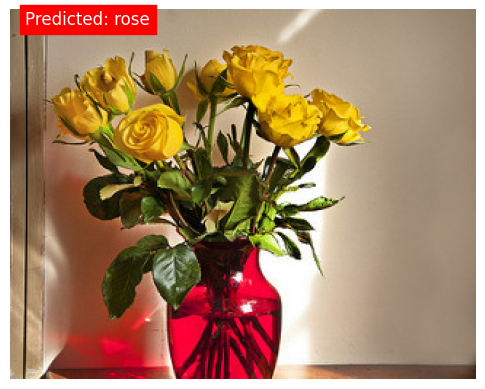

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Display the image with the predicted class name
image = np.array(image)
plt.imshow(image)
plt.axis('off')
plt.text(10, 10, f'Predicted: {predicted_class_name}', fontsize=12, color='white', backgroundcolor='red')
plt.show()